In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [5]:
%autosave 0
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)

Autosave disabled


# Aprendizaje Supervisado

Esquema donde se busca aprender un mapeo o función 

$$
f_{\theta}: \mathcal{X} \rightarrow \mathcal{Y},
$$

donde $\mathcal{X}$ es el dominio de nuestros datos (entrada) e $\mathcal{Y}$ es un objetivo (salida)


Entrenamos nuestro modelo a partir de un conjunto de $N$ ejemplos:

$$
\{(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)\},
$$

donde cada ejemplo es una tupla formada de datos $x_i \in \mathcal{X}$ y objetivo $y_i \in \mathcal{Y}$

Si la variable objetivo es
- continua: hablamos de un problema de regresión o aproximación de funciones
- categórica: hablamos de un problema de clasificación

La naturaleza de los datos  depende del problema

Lo más común es que los datos $x_i$ se estructuren como arreglos de $M$ componentes

A los componentes los llamamos atributos o *features*


### Aprendizaje

El vector $\theta$ corresponde a los **parámetros** del modelo

> Aprender o ajustar el modelo corresponde a encontrar el valor "óptimo" de $\theta$ 

Usamos una **función de pérdida/costo** $L(\theta)$ para medir el error de nuestro modelo

> **Minimizamos** la función de costo para encontrar el mejor $\theta$


Cuando hablamos de $\theta$ "óptimo" lo decimos en el sentido de una función de costo particular


### Optimización

Queremos resolver el siguiente problema
$$
\min_\theta L(\theta)
$$

Una opción es evaluar $L()$ en todo el espacio de posibles $\theta$: Fuerza Bruta

Pero en general esto no es computacionalmente posible

Podemos usar **técnicas de optimización** para encontrar el mejor $\theta$

Si $L(\theta)$ es continua y derivable podemos escribir

$$
\nabla_\theta L(\theta) = \vec 0
$$

e intentar despejar $\theta~$

## Regresión lineal

Modelo para aprender una mapeo entre una o más variables continuas (atributos) hacia una variable continua (objetivo)

En un esquema con $M$ atributos y $N$ ejemplos tenemos

$$
y_i = f_\theta(\vec x_i) = \vec w^T \vec x_i + b = \sum_{j=1}^M w_j x_{ij} + b, 
$$

donde $f_\theta$ es un modelo parámetrico (hiperplano) con $M+1$ parámetros 

$$
\theta= \begin{pmatrix} b \\ w_1 \\ w_2 \\ \vdots \\ w_M \end{pmatrix}
$$

También podemos escribir el sistema matricialmente como

$$
Y = X \theta
$$

donde $Y= \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\y_N\end{pmatrix} \in \mathbb{R}^N$, $X = \begin{pmatrix} 1 & x_{11} & x_{12}& \ldots& x_{1M} \\ \vdots & \vdots & \vdots& \ddots& \vdots \\ 1 & x_{N1} & x_{N2}& \ldots& x_{NM} \\ \end{pmatrix} \in \mathbb{R}^{N\times M}$ y $\theta \in \mathbb{R}^M$

Una función de costo razonable es

$$
L(\theta) = \frac{1}{2} (Y - X\theta)^T (Y - X\theta)
$$

que corresponde al cuadrado de los errores 

Luego si derivamos e igualamos a cero obtenemos

$$
\nabla_\theta L(\theta) = -X^T(Y-X\theta) = 0,
$$

y despejando

$$
\hat \theta = (X^T X)^{-1} X^T Y
$$

siempre y cuando podamos invertir $X^T X$

> Esto se conoce como solución de mínimos cuadrados

#### Funciones base

Podemos generalizar el regresor lineal aplicando transformaciones a $X$

Por ejemplo una regresión polinomial de grado $M$ sería

$$
y_i = f_\theta(x_i) = \sum_{j=1}^M w_j x_{i}^j + b, 
$$

y su solución sería

$$
\hat \theta = (\Phi^T \Phi)^{-1} \Phi^T Y,
$$

donde $\Phi = \begin{pmatrix} 1 & x_1 & x_1^2& \ldots& x_1^M \\ \vdots & \vdots & \vdots& \ddots& \vdots \\ 1 & x_N & x_N^2& \ldots& x_N^M \\ \end{pmatrix}$

<IPython.core.display.Javascript object>


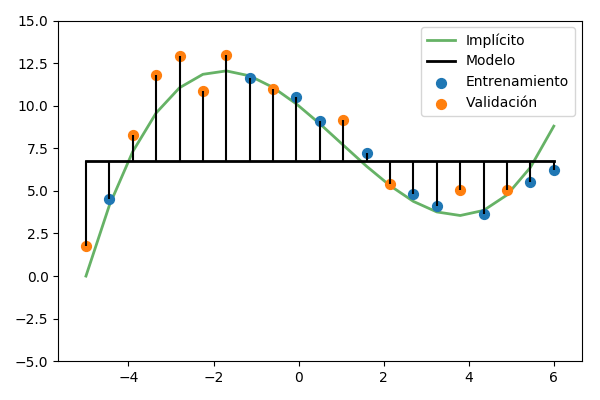

interactive(children=(IntSlider(value=1, continuous_update=False, description='N', layout=Layout(height='20px'…

In [3]:
plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
poly_basis = lambda x,N : np.vstack([x**k for k in range(N)]).T
theta = [10, -2, -0.3, 0.1]
x = np.linspace(-5, 6, num=21); 
X = poly_basis(x, len(theta))
y = np.dot(X, theta)

rseed, sigma = 0, 1.
np.random.seed(rseed);
Y = y + sigma*np.random.randn(len(x))
P = np.random.permutation(len(x))
train_idx, valid_idx = P[:len(x)//2], P[len(x)//2:]

def update_plot(ax, N):
    ax.cla();
    Phi = poly_basis(x, N)
    theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y[train_idx], rcond=None)[0]
    ax.plot(x, y, 'g-', linewidth=2, label='Implícito', alpha=0.6, zorder=-100)
    ax.scatter(x[train_idx], Y[train_idx], s=50, label='Entrenamiento')
    ax.scatter(x[valid_idx], Y[valid_idx], s=50, label='Validación')
    ax.vlines(x[train_idx], np.dot(Phi[train_idx, :], theta_hat), Y[train_idx])  
    ax.vlines(x[valid_idx], np.dot(Phi[valid_idx, :], theta_hat), Y[valid_idx])     
    x_plot = np.linspace(-5, 6, num=100);
    ax.plot(x_plot, np.dot(poly_basis(x_plot, N), theta_hat), 'k-', linewidth=2, label='Modelo')
    ax.set_ylim([-5, 15]); plt.legend()
    
widgets.interact(update_plot, ax=widgets.fixed(ax), N=IntSlider_nice(min=1, max=11));

# Complejidad y Sobreajuste

En el ejemplo anterior vimos que se puede obtener modelos más flexibles si aumentamos el grado del polinomio 

> Aumentar la cantidad de parámetros (grados de libertad) hace al modelo más flexible y más complejo

Si la flexibilidad es excesiva aproximamos los datos con cero error

Esto no es bueno ya que estamos aprendiendo "de memoria" los datos y ajustandonos al ruido

> Sobreajuste: Aprender perfectamente los datos usados para entrenar

El modelo sobreajustado predice muy mal los datos "que no ha visto"

> El sobreajuste es inversamente proporcional a la capacidad de generalización

Por esta razón usamos conjuntos de validación



Figura: https://www.d2l.ai/chapter_multilayer-perceptrons/underfit-overfit.html

# Representatividad y Validación

El primer paso para entrenar nuestro modelo es obtener datos (duh)

Es crítico que los datos que utilizemos **representen** adecuadamente el problema que queremos resolver

Sea un espacio de datos (circulo negro) y muestras (puntos azules), ¿que puede decir de los siguientes casos?

<IPython.core.display.Javascript object>


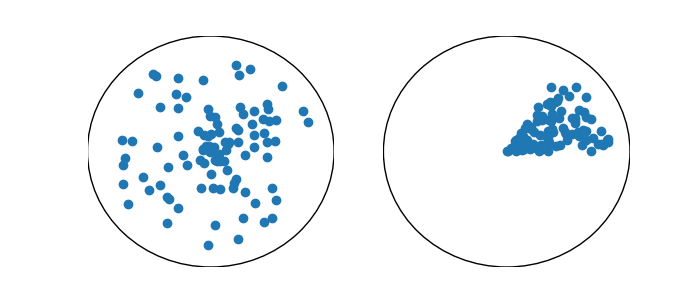

In [4]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
np.random.seed(19)
for ax_ in ax:
    ax_.axis('off') 
    ax_.set_xlim([-3, 3])
    ax_.set_ylim([-3, 3])
r = 2.5*np.random.rand(100); t = np.random.rand(100);
ax[0].scatter(r*np.cos(2.0*np.pi*t), r*np.sin(2.0*np.pi*t))
p = Circle((0, 0), 3, fill=False, ec='k')
ax[0].add_artist(p)
r = 2.5*np.random.rand(100); t = np.random.rand(100);
ax[1].scatter(r*np.cos(t), r*np.sin(t))
p = Circle((0, 0), 3, fill=False, ec='k')
ax[1].add_artist(p); 

Siempre que podamos controlar el proceso de muestreo debemos poner atención a evitar **sesgos**

Asumiendo que nuestro dataset es representativo el siguiente paso es **entrenar**

Para combatir el sobreajuste podemos usar **estrategias de validación**

Consisten en separar el conjunto en dos o más subconjuntos
- Holdout: Entrenamiento/Validación/Prueba
- K-fold cross-validation y Leave one-out (N-fold) cross-validation
- Versiones estratificadas/balanceadas de las anteriores

Para que nuestro conjuntos de entrenamiento y validación sigan siendo representativos del total los **seleccionamos aleatoriamente**

Medimos $L(\theta)$ en entrenamiento y validación

> Optimizamos nuestro modelo minimizando el error de entrenamiento

> Seleccionamos los parámetros e hiper-parámetros que dan mínimo error de validación

> Comparamos distintas familias de modelos  con el error de prueba

En el ejemplo anterior:

<IPython.core.display.Javascript object>


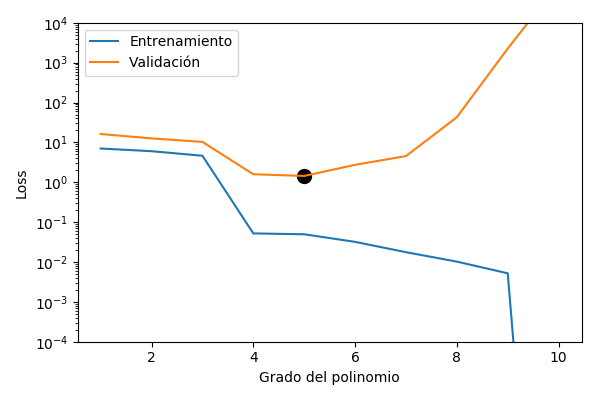

In [5]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
N_values = np.arange(1, 11)
mse = np.zeros(shape=(len(N_values), 2))
for i, N in enumerate(N_values):
    Phi = poly_basis(x, N)
    theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y[train_idx], rcond=None)[0]
    mse[i, 0] = np.mean(np.power(Y[train_idx] - np.dot(Phi[train_idx, :], theta_hat), 2))
    mse[i, 1] = np.mean(np.power(Y[valid_idx] - np.dot(Phi[valid_idx, :], theta_hat), 2))
ax.plot(N_values, mse[:, 0], label='Entrenamiento')
ax.plot(N_values, mse[:, 1], label='Validación')
idx_best = np.argmin(mse[:, 1])
ax.scatter(N_values[idx_best], mse[idx_best, 1], c='k', s=100)
plt.legend()
ax.set_ylim([1e-4, 1e+4])
ax.set_yscale('log')
ax.set_xlabel('Grado del polinomio')
ax.set_ylabel('Loss');

En resumen

- Bajo error de entrenamiento y de validación: **Ideal**

- Bajo error de entrenamiento y alto error de validación: **Modelo sobreajustado**

- Alto error de entrenamiento y de validación: Considera otro modelo y/o revisa tu código


## Neurona artificial o regresor logístico

Modelo para aprender una mapeo entre una o más variables continuas (atributos) hacia una variable binaria (objetivo)

$$
y_i \leftarrow f_\theta(\vec x_i) = \mathcal{S} \left(\theta_0 + \sum_{j=1}^M \theta_j x_{ij}\right) 
$$

donde $\mathcal{S}(z) = \frac{1}{1+\exp(-z)} \in [0, 1]$ se conoce como función logística o sigmoide

> Modelo de clasificación binaria (dos clases)

Podemos interpretar la salida del clasificador como una probabilidad



<IPython.core.display.Javascript object>


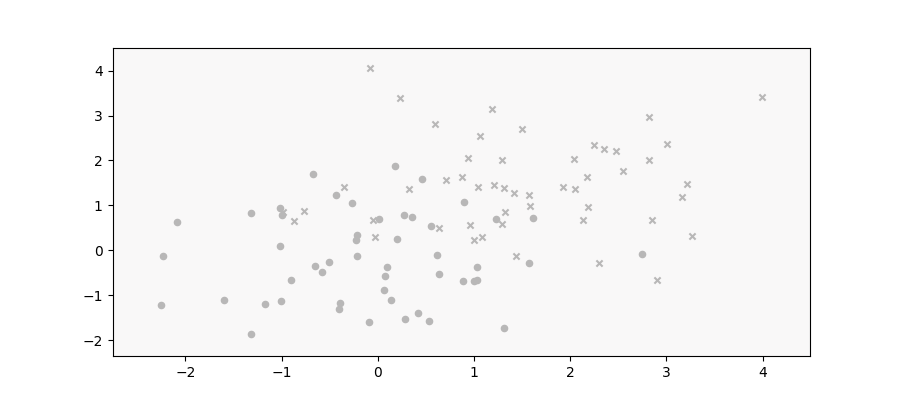

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w1', layout=Layout(height='…

In [6]:
data = np.concatenate((np.random.randn(50, 2), 1.5 + np.random.randn(50, 2)), axis=0)
label = np.array([0]*50 + [1]*50)
fig, ax = plt.subplots(1, figsize=(9, 4))
from matplotlib import cm
#fig.colorbar(cm.ScalarMappable(cmap=plt.cm.RdBu_r), ax=ax)
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

def sigmoid(X, w, b):
    Z = np.dot(X, w) + b
    return 1./(1 + np.exp(-Z))

def update_plot(w1, w2, b):    
    ax.cla()
    ax.scatter(data[:50, 0], data[:50, 1], c='k', s=20)
    ax.scatter(data[50:, 0], data[50:, 1], c='k', s=20, marker='x')
    ax.contourf(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()], np.array([w1, w2]), b).reshape(xx.shape), 
                cmap=plt.cm.RdBu_r, alpha=0.75)


widgets.interact(update_plot, 
                 w1=FloatSlider_nice(min=-10, max=10),
                 w2=FloatSlider_nice(min=-10, max=10),
                 b=FloatSlider_nice(min=-10, max=10));

¿Qué función de costo es apropiada en este caso?

Tipicamente se usa la **Entropía Cruzada Binaria**

$$
L(\theta) = \sum_{i=1}^N  -y_i \log( f_\theta(\vec x_i) ) - (1-y_i) \log(1 - f_\theta(\vec x_i))
$$

¿Por qué?

Calculemos su gradiente 
$$
\begin{align}
\frac{d}{d \theta_j} L(\theta) &= \sum_{i=1}^N  \left(-\frac{y_i}{f_\theta(\vec x_i)} + \frac{1-y_i}{1 - f_\theta(\vec x_i)}\right) \frac{f_\theta(\vec x_i)}{d\theta_j} \nonumber \\
&= (y_i - f_\theta(\vec x_i)) x_{ij}
\end{align}
$$

Por la no linealidad $f_\theta(\vec x_i)$ ya no podemos despejar analiticamente $\theta$ 

> Podemos usar métodos de optimización iterativos

## Optimización: Método de Newton

Sea el valor actual del vector de parámetros $\theta_t$

Queremos encontrar el mejor "próximo valor" según nuestra función objetivo
$$
\theta_{t+1} = \theta_t + \Delta \theta
$$
Consideremos la aproximación de Taylor de segundo orden de $f$
$$
f(\theta_{t} + \Delta \theta) \approx f(\theta_t) + \nabla f (\theta_t) \Delta \theta + \frac{1}{2} \Delta \theta^T H_f (\theta_t) \Delta \theta 
$$
Derivando en función de $\Delta \theta$ e igualando a cero tenemos
$$
\begin{align}
\nabla f (\theta_t)  +  H_f (\theta_t) \Delta \theta &= 0 \nonumber \\
\Delta \theta &= - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)  \nonumber \\
\theta_{t+1} &= \theta_{t} - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)  \nonumber \\
\end{align}
$$

- Se obtiene una regla iterativa en función del **Gradiente** y del **Hessiano**
- La solución depende de $\theta_0$
- "Asumimos" que la aproximación de segundo orden es "buena"
- Si nuestro modelo tiene $N$ parámetros el Hessiano es de $N\times N$, ¿Qué pasa si $N$ es grande?

## Optimización: Gradiente descendente

Si el Hessiano es prohibitivo podemos usar una aproximación de primer orden

El método más clásico es el **gradiente descendente**
$$
\theta_{t+1} = \theta_{t} - \eta \nabla f (\theta_t)
$$

donde hemos reemplazado el Hessiano por una constante $\eta$ llamado "paso" o "tasa de aprendizaje"

- ¿Cómo cambia la optimización con distintos $\eta$?
- ¿Qué ocurre cuando la superficie de error tiene mínimos locales?

<IPython.core.display.Javascript object>


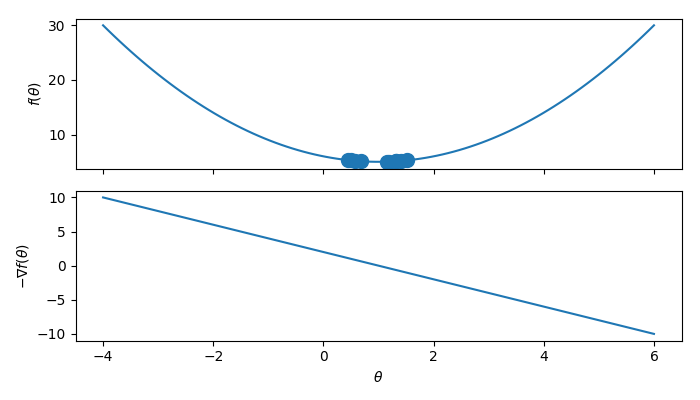

In [8]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)
x = np.linspace(-4, 6, num=100)
f = lambda theta : 5+ (theta-1.)**2 #+ 10*np.sin(theta)
df = lambda theta : 2*(theta -1.) #+ 10*np.cos(theta)
df2 = lambda theta : 2 #- 10*np.cos(theta)

t = 10*np.random.rand(10) - 4.
ax[0].plot(x, f(x))
sc = ax[0].scatter(t, f(t), s=100)

ax[1].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$f(\theta)$')
ax[1].plot(x, -df(x))
ax[1].set_ylabel(r'$-\nabla f(\theta)$')
eta = 0.01

def update(n):
    t = sc.get_offsets()[:, 0]
    t -= eta*df(t)
    #t -= df(t)/(df2(t)+10)
    sc.set_offsets(np.c_[t, f(t)])
    
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False, blit=True)

# Neurona artificial en [PyTorch](https://pytorch.org/)

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset, Subset 

torch_set = TensorDataset(torch.from_numpy(data.astype('float32')), 
                          torch.from_numpy(label.astype('float32')))

import sklearn.model_selection
train_idx, test_idx = next(sklearn.model_selection.ShuffleSplit(train_size=0.6).split(data, label))
torch_train_loader = DataLoader(Subset(torch_set, train_idx), shuffle=True, batch_size=16)
torch_valid_loader = DataLoader(Subset(torch_set, test_idx), shuffle=False, batch_size=256)

/home/hackerter/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1788: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
class Neurona(torch.nn.Module):

    def __init__(self):        
        
        super(Neurona, self).__init__()
        
        self.fc = torch.nn.Linear(in_features=2,  out_features=1, bias=True)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        return self.activation(self.fc(x))

<IPython.core.display.Javascript object>


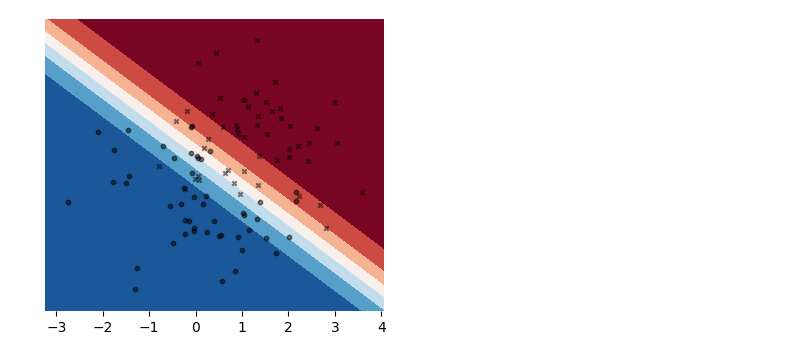

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5), tight_layout=True)

net = Neurona()
n_epochs = 1000
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)
criterion = torch.nn.BCELoss(reduction='sum') 
running_loss = np.zeros(shape=(n_epochs, 2))

def train_one_epoch(net):
    train_loss, valid_loss = 0.0, 0.0
    for sample_data, sample_label in torch_train_loader:
        output = net(sample_data)
        optimizer.zero_grad()        
        loss = criterion(output, sample_label)  
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    for sample_data, sample_label in torch_valid_loader:
        output = net(sample_data)
        loss = criterion(output, sample_label)  
        valid_loss += loss.item()
    return train_loss/torch_train_loader.dataset.__len__(), valid_loss/torch_valid_loader.dataset.__len__()
    
def update_plot(k):
    global net, running_loss
    [ax_.cla() for ax_ in ax]
    running_loss[k, 0], running_loss[k, 1] = train_one_epoch(net)
    Z = net.forward(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()].astype('float32')))
    Z = Z.detach().numpy().reshape(xx.shape)
    ax[0].contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=1., vmin=0, vmax=1)
    for i, (marker, name) in enumerate(zip(['o', 'x'], ['Train', 'Test'])):
        ax[0].scatter(data[label==i, 0], data[label==i, 1], color='k', s=10, marker=marker, alpha=0.5)
        ax[1].plot(np.arange(0, k+1, step=1), running_loss[:k+1, i], '-', label=name+" cost")
    plt.legend(); ax[1].grid()

#update_plot(0)
anim = animation.FuncAnimation(fig, update_plot, frames=n_epochs, 
                               interval=10, repeat=False, blit=False)

# Métricas: Evaluando un clasificador binario

La salida de este clasificador es un valor en el rango $[0, 1]$

Para tomar un decisión binaria se debe seleccionar un umbral $\mathcal{T}$ tal que

$$
d_i = 
\begin{cases} 
0, & \text{si } f_\theta(\vec x_i)  < \mathcal{T} \\ 
1, & \text{si } f_\theta(\vec x_i) \geq \mathcal{T}
\end{cases}
$$

Una vez seleccionado el umbral se puede contar la cantidad de 
- **True positives** (TP): Era clase (1) y lo clasifico como (1)
- **True negative** (TN): Era clase (0) y lo clasifico como (0)
- **False positives** (FP): Era clase (0) y lo clasifico como (1): Error tipo I
- **False negative** (FN): Era clase (1) y lo clasifico como (0): Error tipo II

A partir de estas métricas se construye la **tabla de confusión** del clasificador

|Clasificado como/En realidad era|Positivo|Negativo|
|---|---|---|
|Positivo:|TP | FP |
|Negativo:| FN | TN |

En base a estas métricas se construyen otras 
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
también conocida como la **Tasa de verdaderos positivos** (TPR) o sensitividad

> TPR: La proporción de positivos correctamente clasificados respecto al total de positivos

$$
\text{FPR} = \frac{FP}{TN + FP} = 1 - \frac{TN}{TN + FP}
$$

la **tasa de falsos positivos** (FPR) también representada como "1 - especificidad"


> FPR: La proporción de negativos incorrectamente clasificados respecto al total de negativos

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

también conocido como pureza

> Precision: La proporción de positivos correctamente clasificados respecto a todos los ejemplos clasificados como positivo

$$
\text{Accuracy} = \frac{TP+TN}{TP + FP + FN+ TN}
$$

> Accuracy: La proporción de ejemplos correctamente clasificados

$$
\text{f1-score} = \frac{2*\text{Recall}*\text{Precision}}{\text{Recall} + \text{Precision}}
$$

> f1-score: Media armónica entre Recall y Precision asumiendo igual ponderación

Si las clases son desbalanceadas entonces f1-score es más aconsejable que accuracy

In [9]:
net = Neurona()
probability = net(torch_set.tensors[0]).detach().numpy()
import sklearn.metrics

print("Matriz de confusión:")
print(sklearn.metrics.confusion_matrix(y_true=torch_set.tensors[1].numpy().astype(int), 
                                       y_pred=probability[:, 0] > 0.5))

print(sklearn.metrics.classification_report(y_true=torch_set.tensors[1].numpy().astype(int), 
                                      y_pred=probability[:, 0] > 0.5))

Matriz de confusión:
[[40 10]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        50
           1       0.80      0.82      0.81        50

   micro avg       0.81      0.81      0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



Notar que a distintos umbrales $\mathcal{T}$ se obtienen distintas tablas de confusión

Se midemos estas métricas usando distintos umbrales podemos construir una curva de desempeño

Tipicamente se usan
- Curva ROC: TPR vs FPR
- Curva Precision vs Recall

<IPython.core.display.Javascript object>


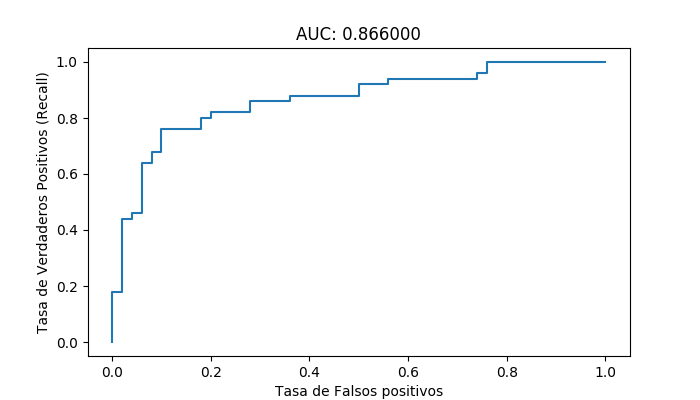

Text(0.5, 1.0, 'AUC: 0.866000')

In [10]:
fpr, tpr, th = sklearn.metrics.roc_curve(y_true=torch_set.tensors[1].numpy().astype(int), 
                          y_score=probability[:, 0])

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(fpr, tpr);
ax.set_xlabel('Tasa de Falsos positivos')
ax.set_ylabel('Tasa de Verdaderos Positivos (Recall)')
ax.set_title('AUC: %f' %sklearn.metrics.auc(fpr, tpr))

<IPython.core.display.Javascript object>


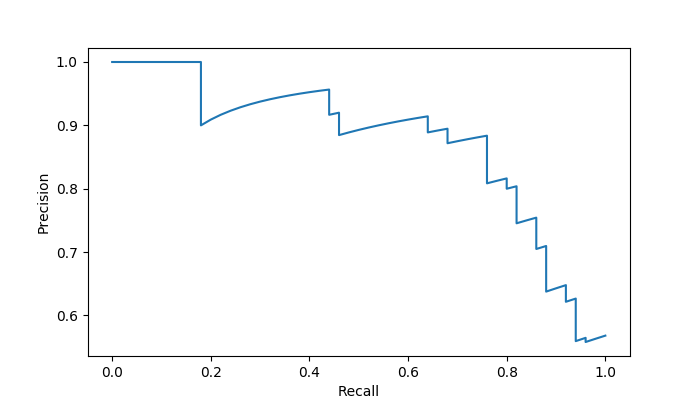

Text(0, 0.5, 'Precision')

In [11]:
prec, rec, th = sklearn.metrics.precision_recall_curve(y_true=torch_set.tensors[1].numpy().astype(int), 
                                                       probas_pred=probability[:, 0])

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(rec, prec, '-');
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

# Ojo con:


#### La distribución de los datos donde se aplicará el clasificador es distinta a la que usaste para entrenar/validar

Actualiza tus conjuntos de datos para que sean representativos!

#### Usa los subconjuntos adecuadamente

Ajusta los parámetros con el set de validación

Compara distintas familias de modelos con el set de prueba


#### La métrica que usas no es la adecuada para el problema

Si el problema tiene clases desbalanceadas el *accuracy* puede ser muy alto, contrasta usando métricas sencibles al desbalance (e.g. *f1-score*)

#### Mi modelo se sobreajusta de inmediato

Prueba disminuyendo la complejidad/arquitectura del modelo o añadiendo **regularización**

Esto también puede ser señal de que necesitas más ejemplos para entrenar

Se pueden usar **Técnicas de aumentación** de datos

#### Mi modelo no está aprendiendo

Si estas seguro que no hay bugs prueba aumentando la complejidad del modelo

#### Estudia los errores de tu modelo para mejorarlo

Analiza los datos mal clasificados y busca patrones

Revisa que las etiquetas estén correctas

Revisa que los atributos estén adecuadamente calculados

Propon nuevos atributos que ayuden a clasificador los ejemplos difíciles

